In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [14]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
numerical_cols = ['age', 'trestbps','chol','thalach']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
num_pipeline=Pipeline(
    steps=[
        
        ('scaler',StandardScaler())## feature scaling 
    ]

)



In [19]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    
])

In [20]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [21]:
X_train

array([[-1.67339636e+00, -2.14786993e+00, -8.86805126e-01,
         1.27119034e+00],
       [-2.76362385e+00, -2.77789696e-02, -7.95024865e-01,
         2.28448510e+00],
       [-4.74146109e-01, -6.16693124e-01, -5.19684082e-01,
         3.46008160e-01],
       [-3.80551107e-02,  5.61135185e-01, -1.52563038e-01,
         4.34120748e-01],
       [-1.78241911e+00,  4.43352354e-01, -1.32735038e+00,
         1.00685257e+00],
       [ 3.98035888e-01, -2.77789696e-02, -9.23517230e-01,
        -8.43511783e-01],
       [-2.56100610e-01, -1.32339011e+00, -2.62699351e-01,
        -1.38611077e-01],
       [-1.12828261e+00, -6.16693124e-01, -5.01328030e-01,
         8.74683690e-01],
       [ 1.05217239e+00, -3.22236047e-01,  1.13236062e+00,
        -8.43511783e-01],
       [-3.80551107e-02,  1.15004934e+00, -2.81055403e-01,
         6.54402219e-01],
       [ 3.98035888e-01, -6.16693124e-01,  1.70139824e+00,
         9.62796278e-01],
       [-8.01214358e-01, -1.08782445e+00, -7.95024865e-01,
      

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
classifier=RandomForestClassifier(max_depth=10,oob_score=True,n_estimators=100)

In [32]:
classifier

RandomForestClassifier(max_depth=10, oob_score=True)

In [34]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, oob_score=True)

In [35]:
y_pred=classifier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6153846153846154
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        41
           1       0.66      0.62      0.64        50

    accuracy                           0.62        91
   macro avg       0.61      0.61      0.61        91
weighted avg       0.62      0.62      0.62        91

[[25 16]
 [19 31]]


In [38]:
importance = classifier.feature_importances_
for feature, importance in zip(X, importance):
    print(feature, importance)

age 0.2271512733689523
sex 0.19145017585788499
cp 0.23008900569707458
trestbps 0.35130954507608825


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (4,).

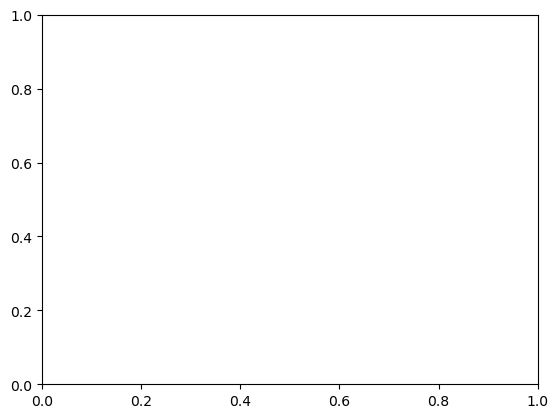

In [40]:
plt.bar(range(X.shape[1]), classifier.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [41]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.721 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.595 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.619 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.643 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.698 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.744 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.619 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.595 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.595 total time=   0.4s
[CV 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    oob_score=True),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [46]:
cv.best_params_

{'n_estimators': 300, 'max_depth': 3, 'criterion': 'gini'}

In [49]:
classifier=RandomForestClassifier(n_estimators= 300, max_depth=3, criterion= 'gini')

In [50]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=300)

In [51]:
y_pred=classifier.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7142857142857143
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        41
           1       0.74      0.74      0.74        50

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91

[[28 13]
 [13 37]]
